In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("E:\Python\ML PROJECTS\Credit card fraud detection\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print('No Fraud',df['Class'].value_counts()[0]/len(df)*100)
print('Fraud',df['Class'].value_counts()[1]/len(df)*100)

No Fraud 99.82725143693798
Fraud 0.1727485630620034


Data is heavily Imbalanced

Text(0.5, 1.0, 'Class Distribution 1- Fraud & 0- Non Fraud')

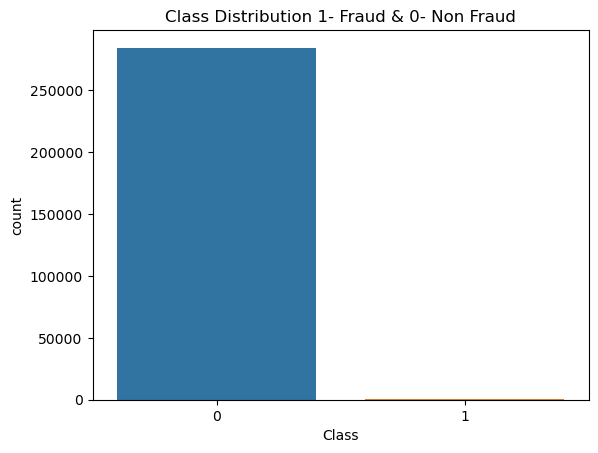

In [10]:
sns.countplot(df['Class'],data=df)
plt.title('Class Distribution 1- Fraud & 0- Non Fraud')

Distribution of Time and Amount

(0.0, 25691.16)

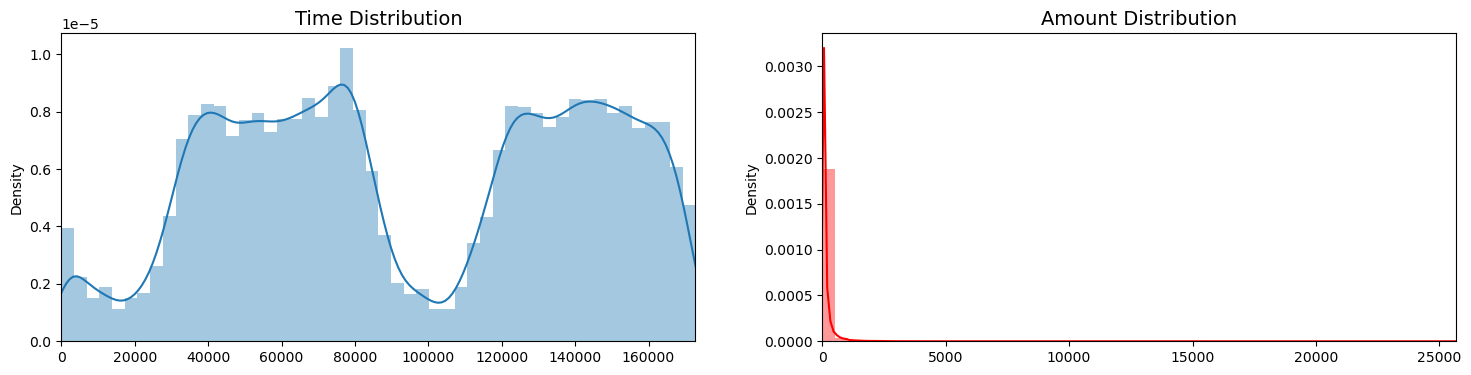

In [11]:
fig, ax=plt.subplots(1,2,figsize=(18,4))

time=df['Time'].values
amount=df['Amount'].values

sns.distplot(time,ax=ax[0])
ax[0].set_title('Time Distribution',fontsize=14)
ax[0].set_xlim([min(time), max(time)])

sns.distplot(amount,ax=ax[1],color='red')
ax[1].set_title('Amount Distribution',fontsize=14)
ax[1].set_xlim([min(amount), max(amount)])

# Scaling and Sub sampling

Need to scale Time and Amount

Do a subsampling of df that should have 50/50 of 0 and 1 (due to imbalanced dataset doing subsampling)

In [12]:
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'],axis=1,inplace=True)


In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [14]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
Y=df['Class']

sss=StratifiedKFold(n_splits=5,shuffle=False)
for train_index,test_index in sss.split(X,Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = Y.iloc[train_index], Y.iloc[test_index]

original_Xtrain=original_Xtrain.values
original_Xtest=original_Xtest.values
original_ytrain=original_ytrain.values
original_ytest=original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_unique_label,train_counts_label)
print(test_unique_label,test_counts_label)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0 1] [227452    394]
[0 1] [56863    98]


In [15]:
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [16]:
len(original_Xtest)

56961

# Random Under Sampling

In [17]:
df=df.sample(frac=1)

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [20]:
normalized_distributed_df=pd.concat([fraud_df,non_fraud_df])

In [21]:
normalized_distributed_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
new_df=normalized_distributed_df.sample(frac=1,random_state=42)

In [23]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
208978,-0.167819,0.618687,-0.372681,0.293078,-0.896237,-2.498479,0.896176,-1.237756,1.306413,-0.703945,...,-0.390107,0.025042,0.321853,-0.053485,0.623985,0.111990,-0.293260,-0.836137,-0.182200,0
176049,29.398030,0.445447,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,...,3.973217,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,1
255282,-0.167819,0.851232,-0.321740,0.530888,0.994464,-0.737387,0.945870,-0.555080,1.065368,-0.222654,...,0.002242,-0.299451,-0.781650,-0.316953,-0.384255,0.802394,-0.468478,-0.295917,-0.356686,0
44223,1.647453,-0.503307,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,...,0.427203,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,1
230476,1.017537,0.724304,-0.099724,2.795414,-6.423856,3.247513,-1.632290,-2.766665,-2.312223,0.961014,...,0.340898,0.647714,0.126576,0.203953,0.008495,-0.174501,0.575295,0.152876,-0.098173,1


# Analysis and Preprocessing of New balanced Dataframe

Text(0.5, 1.0, 'Equal distribution')

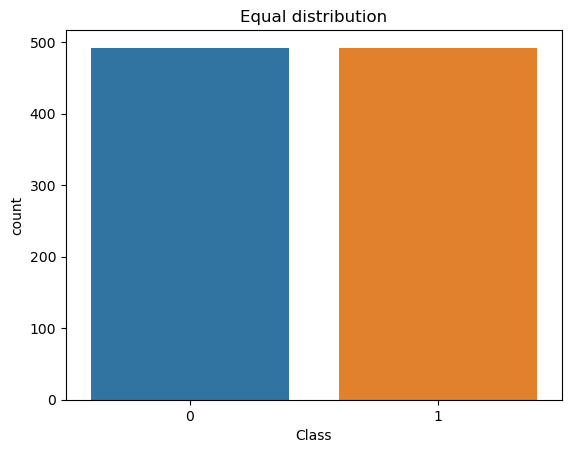

In [24]:
sns.countplot('Class',data=new_df)
plt.title('Equal distribution')

# Correlation Matrices

In [25]:
new_df.corr()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
scaled_amount,1.000000,0.036291,-0.023106,-0.197274,-0.017867,0.003780,-0.114132,0.133273,0.107433,0.038212,...,0.106174,0.024974,0.004428,-0.154057,0.037715,-0.086096,-0.050022,0.091519,-0.086620,0.119906
scaled_time,0.036291,1.000000,0.237987,-0.219231,0.123885,-0.178027,0.269204,0.073164,0.199322,-0.137989,...,-0.026991,-0.049383,0.138047,0.052195,0.005676,-0.177302,-0.031037,-0.136297,0.004422,-0.098156
V1,-0.023106,0.237987,1.000000,-0.821124,0.878424,-0.615224,0.867092,0.311753,0.893721,-0.076248,...,-0.325375,0.020718,-0.053675,-0.047639,-0.064829,-0.074610,0.056250,0.191526,0.197743,-0.437643
V2,-0.197274,-0.219231,-0.821124,1.000000,-0.867974,0.690207,-0.811126,-0.251174,-0.850613,-0.031865,...,0.336491,0.028587,0.000305,0.151964,0.002626,0.115552,0.025480,-0.165320,0.003633,0.486645
V3,-0.017867,0.123885,0.878424,-0.867974,1.000000,-0.772122,0.855357,0.449059,0.888731,-0.166010,...,-0.365018,0.028671,-0.073232,-0.030206,0.021154,-0.087283,-0.040093,0.098641,0.137128,-0.571246
V4,0.003780,-0.178027,-0.615224,0.690207,-0.772122,1.000000,-0.580448,-0.415847,-0.710681,0.105648,...,0.303251,-0.014836,0.119523,0.018767,-0.068158,-0.017362,0.170786,-0.006682,-0.073802,0.707157
V5,-0.114132,0.269204,0.867092,-0.811126,0.855357,-0.580448,1.000000,0.290279,0.840270,-0.203766,...,-0.326040,0.044543,-0.098078,-0.092041,-0.134016,-0.100068,0.036567,0.191810,0.181879,-0.379097
V6,0.133273,0.073164,0.311753,-0.251174,0.449059,-0.415847,0.290279,1.000000,0.262815,-0.573320,...,-0.085292,-0.005698,0.013655,0.331614,0.007459,-0.112324,-0.066779,-0.159934,-0.021483,-0.387046
V7,0.107433,0.199322,0.893721,-0.850613,0.888731,-0.710681,0.840270,0.262815,1.000000,0.099121,...,-0.406771,0.052134,-0.131914,-0.092803,-0.034320,0.046998,0.010894,0.231006,0.154043,-0.471603
V8,0.038212,-0.137989,-0.076248,-0.031865,-0.166010,0.105648,-0.203766,-0.573320,0.099121,1.000000,...,-0.076919,-0.078093,0.016126,-0.433347,0.081816,0.228136,0.049687,0.290119,-0.020927,0.063524


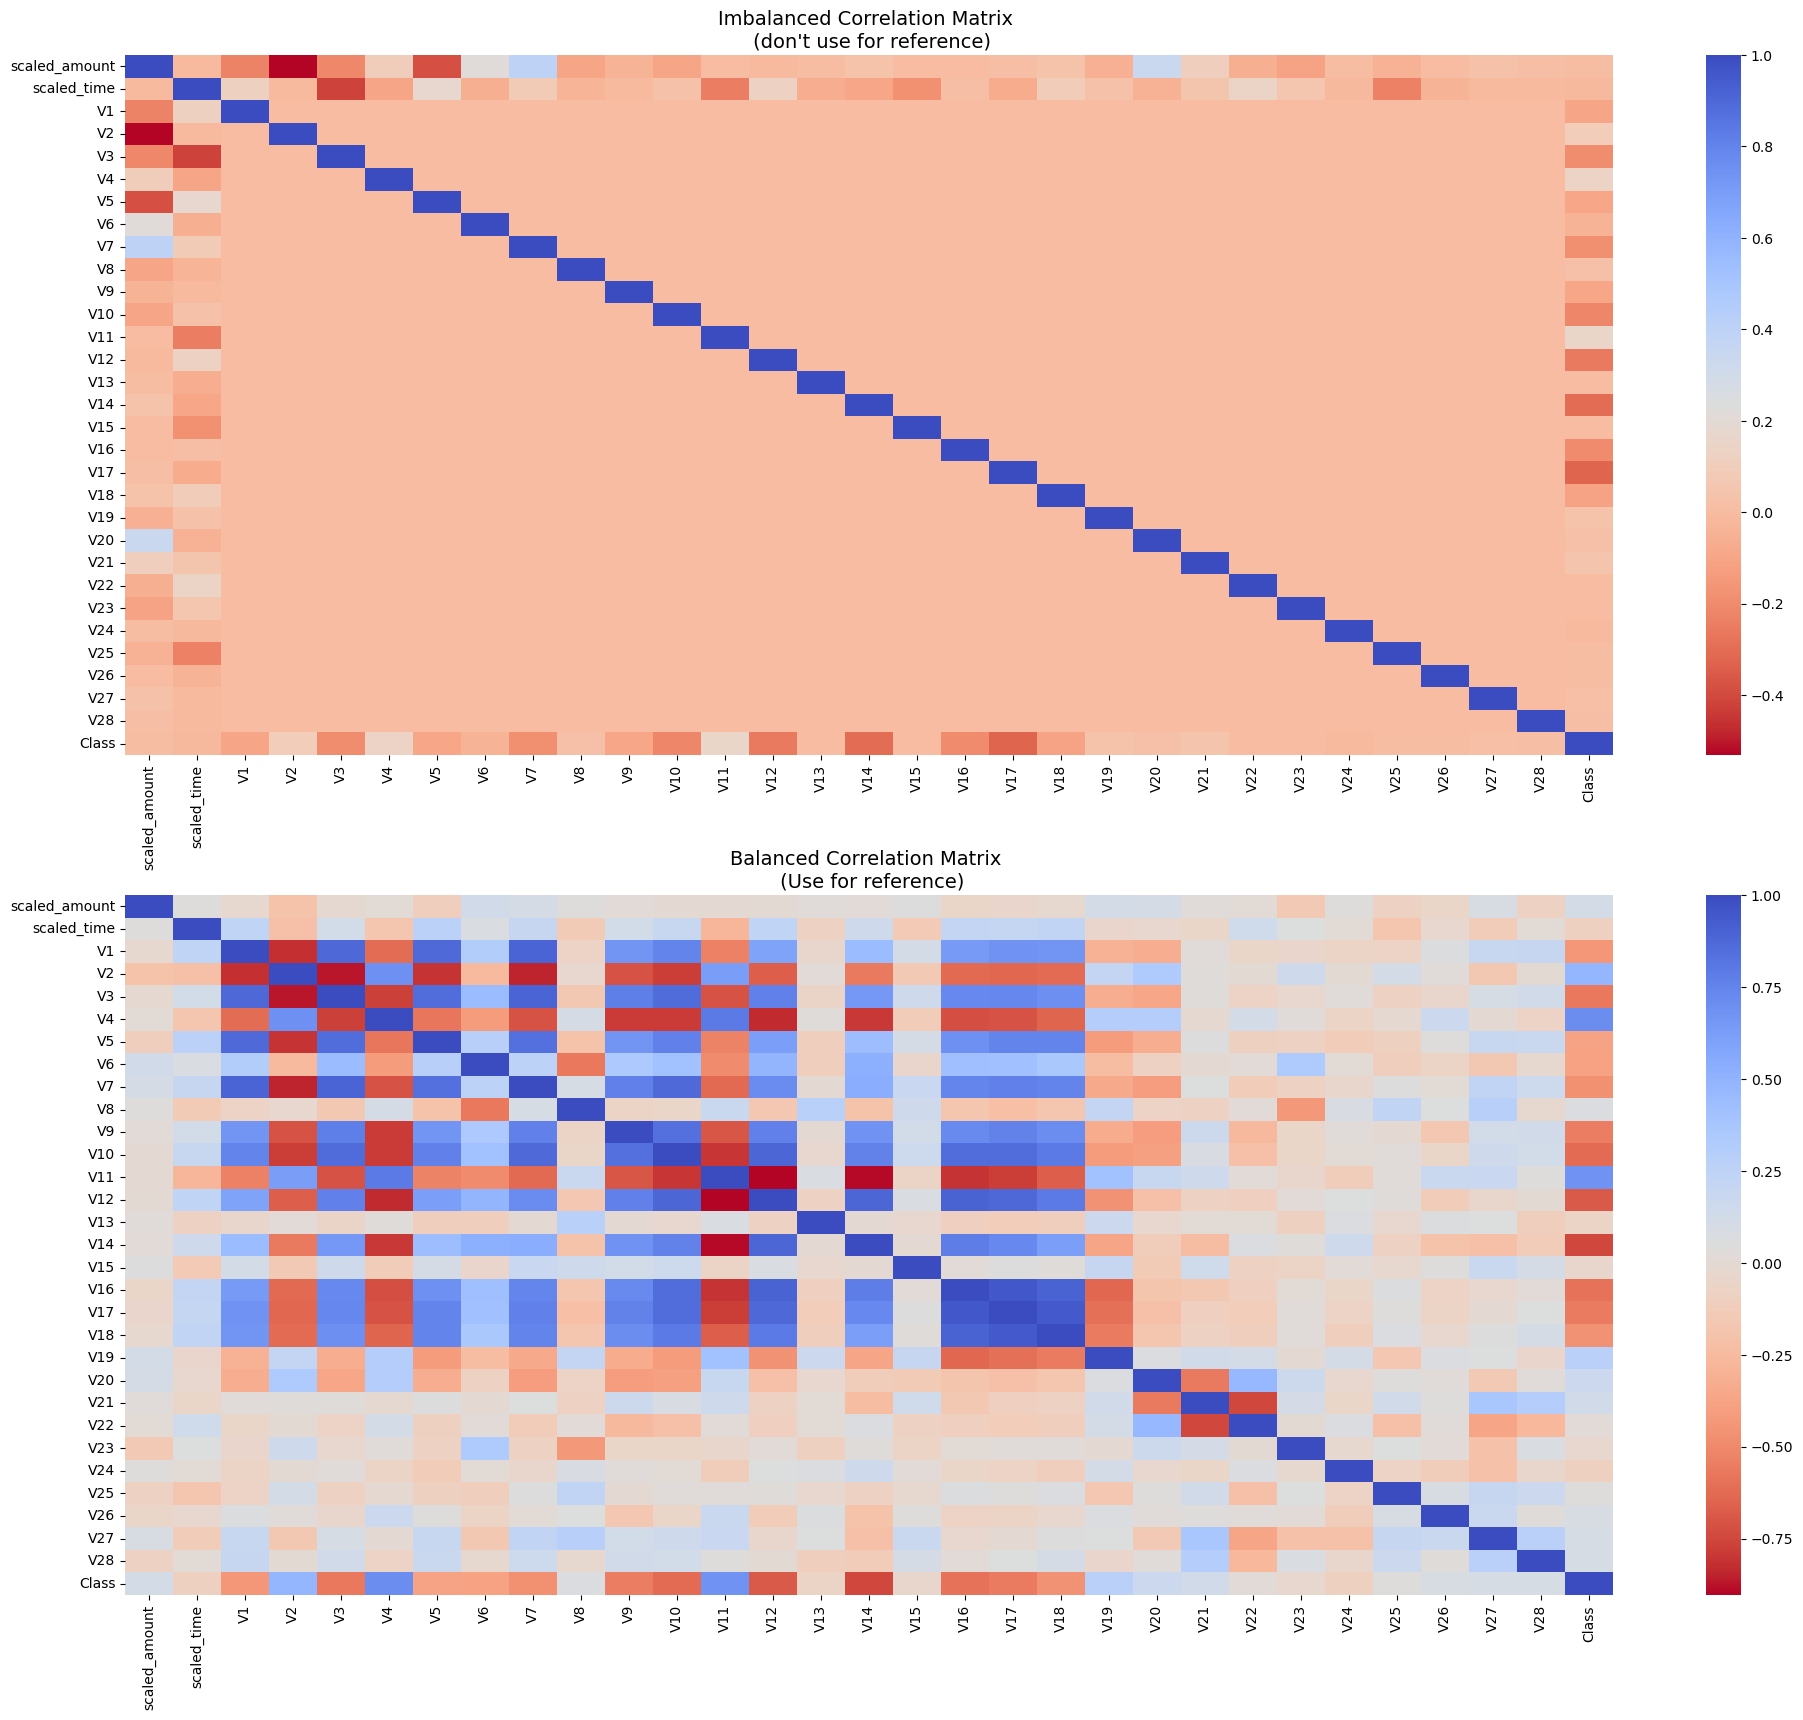

In [26]:
 f,(ax1,ax2)=plt.subplots(2,1,figsize=(24,20))

corr=df.corr()
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

corr1=new_df.corr()
sns.heatmap(corr1,cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("Balanced Correlation Matrix \n (Use for reference)", fontsize=14)
plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

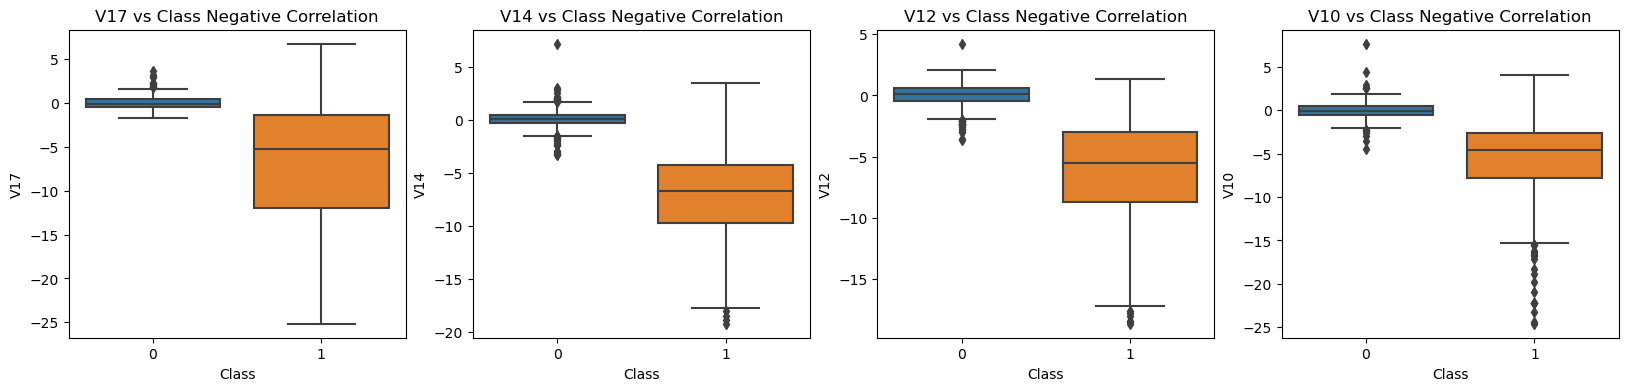

In [27]:
f,ax=plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V17',data=new_df,ax=ax[0])
ax[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=ax[1])
ax[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=ax[2])
ax[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=ax[3])
ax[3].set_title('V10 vs Class Negative Correlation')

plt.show()

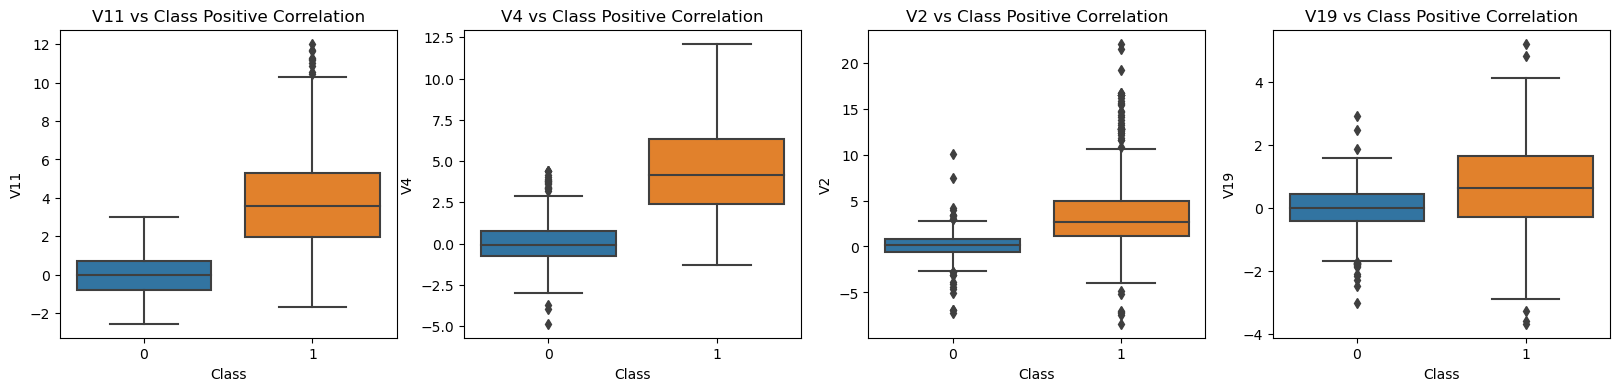

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

# Anomaly detection

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


Interquartile Range Method:
Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

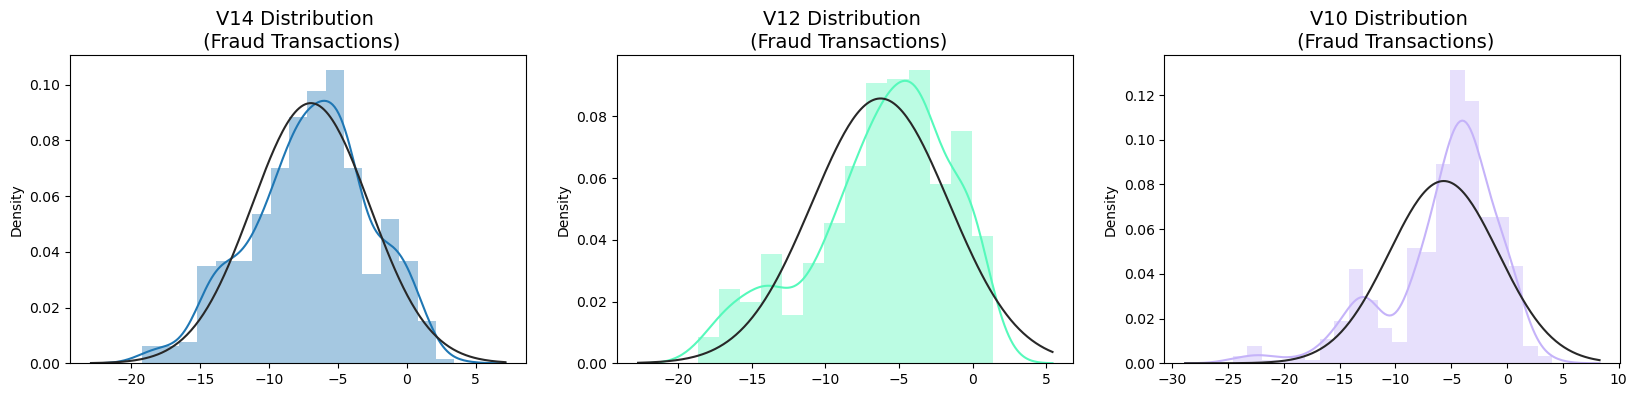

In [29]:
from scipy.stats import norm
f, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))

v14_fraud_dist=new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

In [30]:
v14_fraud=new_df['V14'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
IQR=q75-q25
print(f"IQR {IQR}")
lower_fence, upper_fence= q25 -(1.5*IQR) , q75 +(1.5*IQR)
print(f"Lower fence {lower_fence}")
print(f"Upper fence {upper_fence}")

outliers=[ x for x in v14_fraud if (x > upper_fence) |( x < lower_fence )]
print(f'Outliers {outliers}')

new_df=new_df.drop(new_df[(new_df['V14'] > upper_fence)|(new_df['V14'] < lower_fence)].index)

IQR 5.409902115485521
Lower fence -17.807576138200666
Upper fence 3.8320323237414167
Outliers [-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]


In [31]:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.6837146333443, -18.0475965708216, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975


In [32]:
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.6496281595399, -15.2399619587112, -15.2318333653018, -18.2711681738888, -22.1870885620007, -23.2282548357516, -17.1415136412892, -18.9132433348732, -16.7460441053944, -22.1870885620007, -16.6011969664137, -24.5882624372475, -15.3460988468775, -19.836148851696, -16.3035376590131, -15.5637913387301, -15.1237521803455, -15.5637913387301, -22.1870885620007, -15.1241628144947, -14.9246547735487, -15.2399619587112, -24.4031849699728, -16.2556117491401, -14.9246547735487, -20.9491915543611, -22.1870885620007]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 947


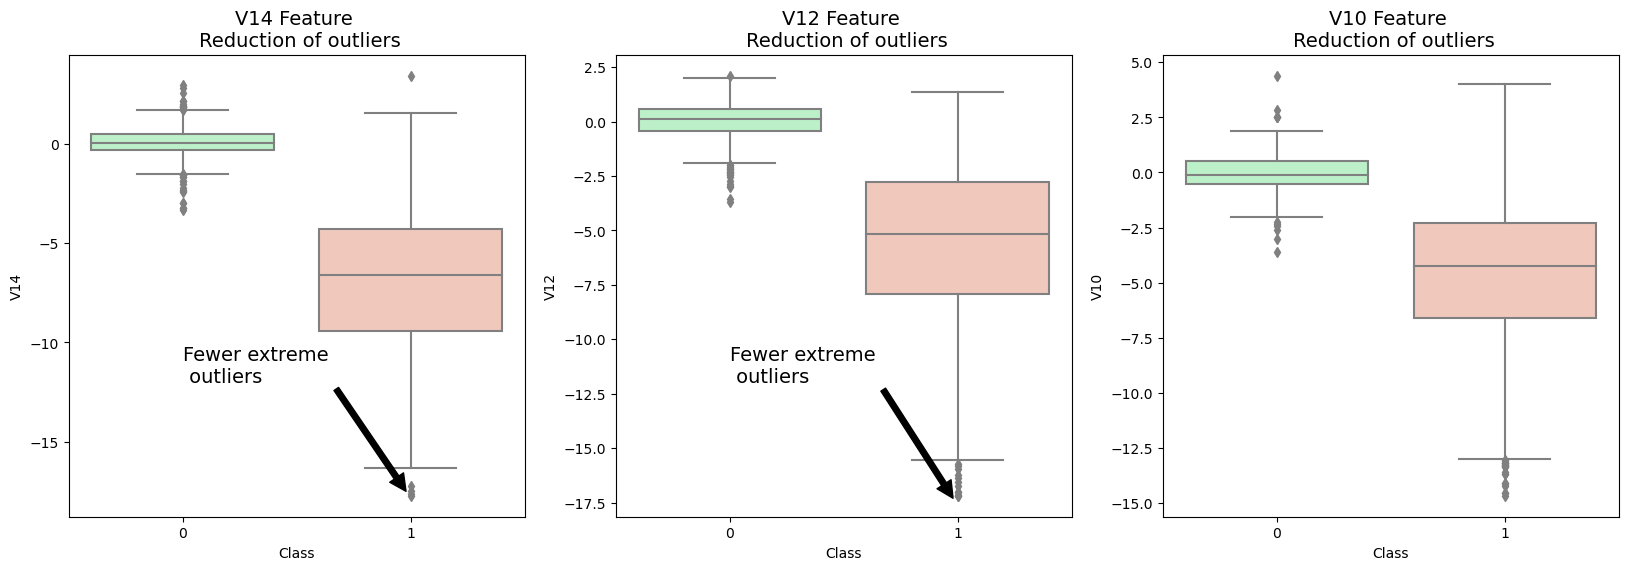

In [33]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

# Dimensionality Reduction and Clustering:

In [34]:
import time
X=new_df.drop('Class',axis=1)
Y=new_df['Class']

t0=time.time()
X_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print("TSNE took {:.2} s".format(t1-t0))

t0=time.time()
X_reduce_pca=PCA(n_components=2, random_state=42).fit_transform(X.values)
t1=time.time()
print("PCA took {:.2}s".format(t1-t0) )

t0=time.time()
X_reduced_svd=TruncatedSVD(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

TSNE took 1.2e+01 s
PCA took 0.24s
Truncated SVD took 0.0091 s


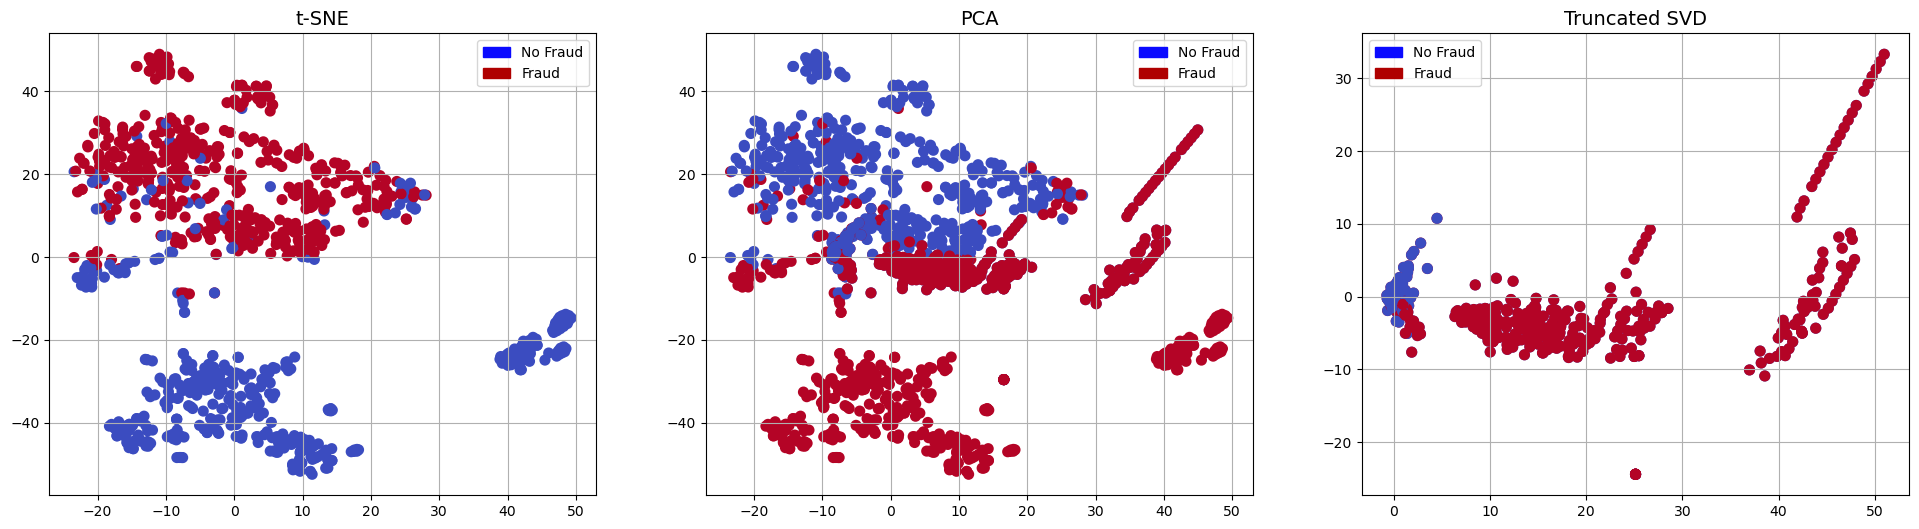

In [35]:
f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(24,6))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax2.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduce_pca[:,0], X_reduce_pca[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduce_pca[:,0], X_reduce_pca[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# Classifiers (UnderSampling):
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

In [36]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [39]:
classifiers={
    'LogisticRegression':LogisticRegression(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [40]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
                                   

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


# Hyper parameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

log_reg_params={'penalty':['l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
log_reg = grid_log_reg.best_estimator_

In [42]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [43]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

In [44]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [45]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.85%
Knears Neighbors Cross Validation Score 94.05%
Support Vector Classifier Cross Validation Score 94.05%
DecisionTree Classifier Cross Validation Score 92.47%


In [46]:
from imblearn.under_sampling import NearMiss

undersample_X=df.drop('Class',axis=1)
undersample_y=df['Class']
for train_index,test_index in sss.split(undersample_X,undersample_y):
    print('train index ', train_index,' test index ', test_index)
    undersample_Xtrain, undersample_Xtest=undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_Ytrain,undersample_Ytest=undersample_y.iloc[train_index] , undersample_y.iloc[test_index]
    
undersample_Xtrain=undersample_Xtrain.values
undersample_Xtest=undersample_Xtest.values
undersample_Ytrain=undersample_Ytrain.values
undersample_Ytest=undersample_Ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

nm = NearMiss()

X_nearmiss, y_nearmiss= nm.fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

for train, test in sss.split(undersample_Xtrain,undersample_Ytrain):
    undersample_pipeline=imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),log_reg)
    undersample_model=undersample_pipeline.fit(undersample_Xtrain[train], undersample_Ytrain[train])
    undersample_prediction=undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

train index  [ 56958  56959  56960 ... 284804 284805 284806]  test index  [    0     1     2 ... 57670 57731 58007]
train index  [     0      1      2 ... 284804 284805 284806]  test index  [ 56958  56959  56960 ... 113921 114943 115450]
train index  [     0      1      2 ... 284804 284805 284806]  test index  [113922 113923 113924 ... 170889 170890 170891]
train index  [     0      1      2 ... 284804 284805 284806]  test index  [161853 162364 165450 ... 227844 227845 227846]
train index  [     0      1      2 ... 227844 227845 227846]  test index  [227249 227847 227848 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [50]:
from sklearn.model_selection import ShuffleSplit, learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

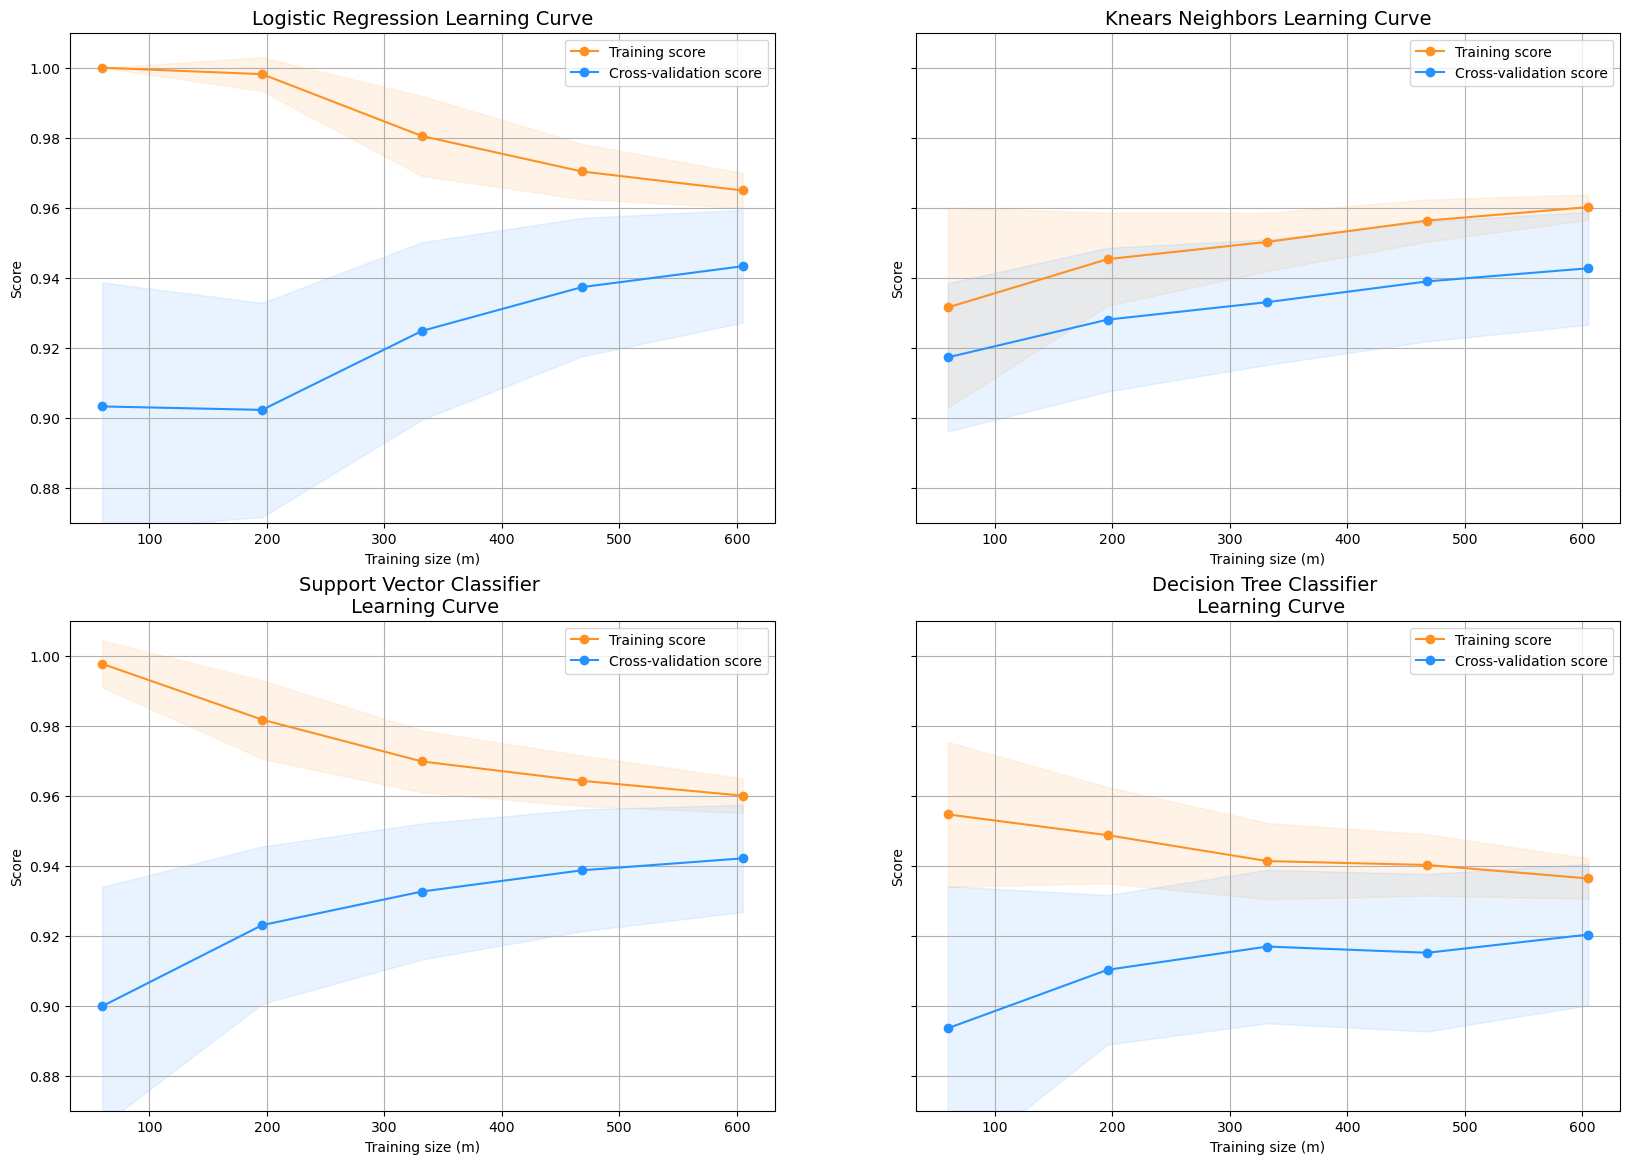

In [51]:
cv= ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)
plot_learning_curve(log_reg,knears_neighbors,svc,tree_clf,X_train,y_train,(0.87, 1.01),cv=cv,n_jobs=4)

In [53]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred =cross_val_predict(log_reg,X_train,y_train,cv=5,method='decision_function')
knears_pred=cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [54]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9741604960736832
KNears Neighbors:  0.9374623815456112
Support Vector Classifier:  0.9776458896152069
Decision Tree Classifier:  0.9217046233955292


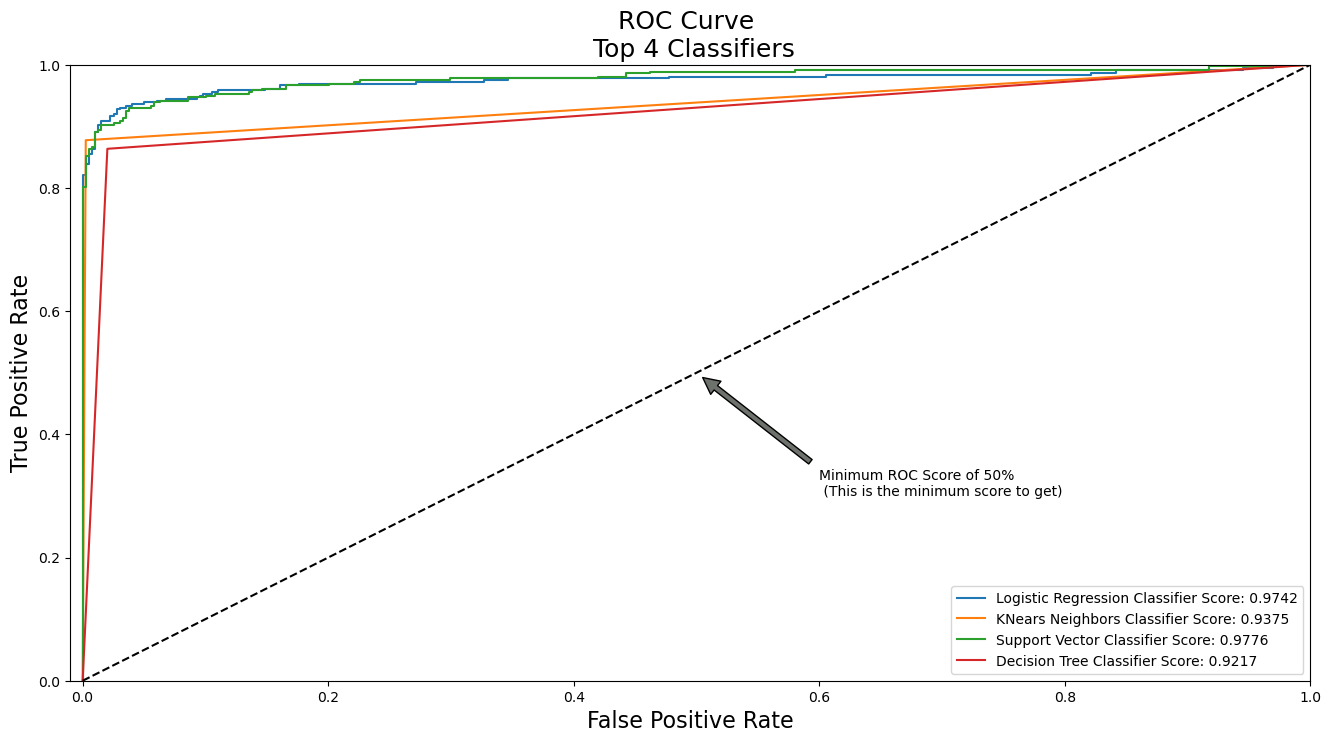

In [55]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr,log_tpr,knear_fpr,knear_tpr,svc_fpr,svc_tpr,tree_fpr,tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Terms:
True Positives: Correctly Classified Fraud Transactions

False Positives: Incorrectly Classified Fraud Transactions

True Negative: Correctly Classified Non-Fraud Transactions

False Negative: Incorrectly Classified Non-Fraud Transactions

Precision: True Positives/(True Positives + False Positives)

Recall: True Positives/(True Positives + False Negatives)

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

# Deep look into Logistic regression

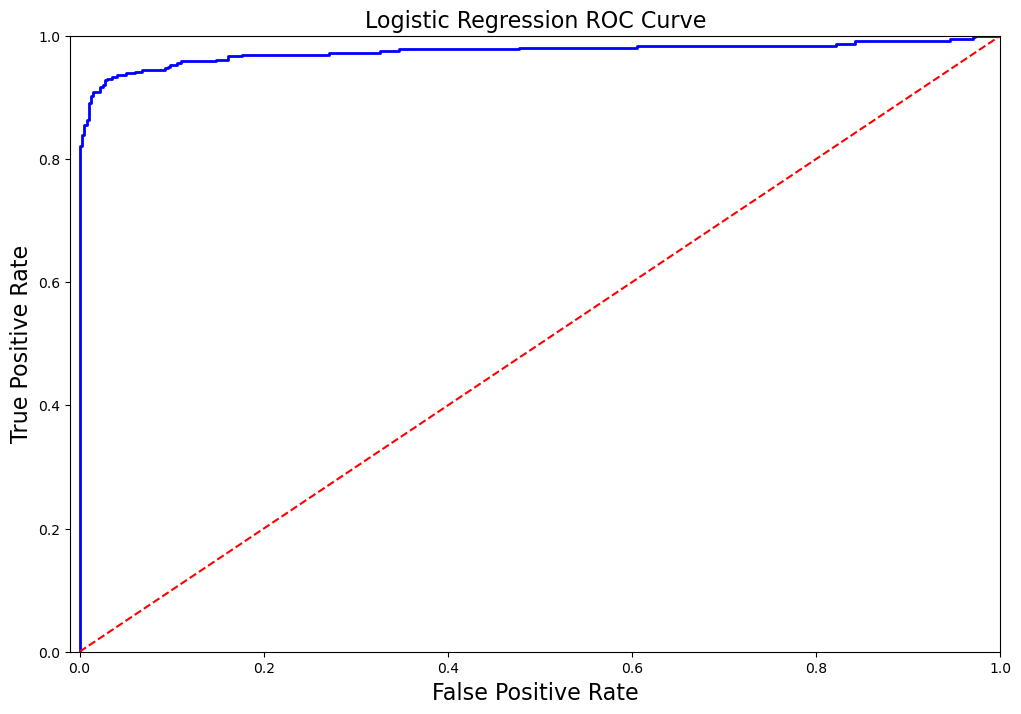

In [57]:
def logistic_roc_curve(log_fpr,log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr,log_tpr,'b-',linewidth=2)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [58]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train,log_reg_pred)

In [59]:
from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
y_pred=log_reg.predict(X_train)

print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.94
Precision Score: 0.63
F1 Score: 0.75
Accuracy Score: 0.71
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.53
Precision Score: 0.00
Recall Score: 0.38
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [60]:
undersample_y_score=log_reg.decision_function(original_Xtest)

In [62]:
from sklearn.metrics import average_precision_score
undersample_average_precision= average_precision_score(original_ytest,undersample_y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.00


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.00')

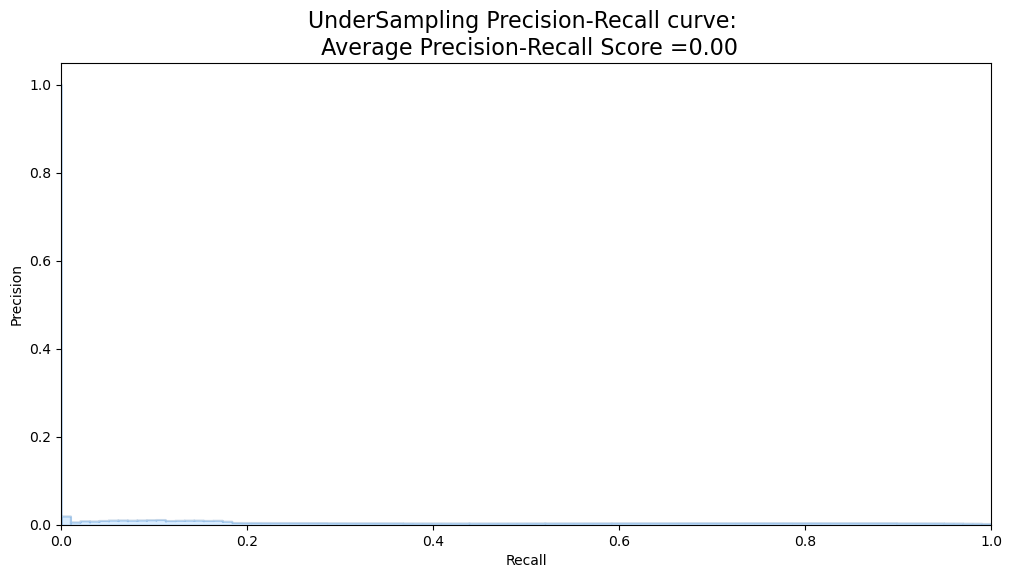

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

# SMOTE (OVERSAMPLING)

 SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.

Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm= LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

for train,test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9430191932999739
precision: 0.06324731587137547
recall: 0.9162934112301201
f1: 0.11648142823086279
---------------------------------------------------------------------------------------------------------------------------------------


In [69]:
labels=['No Fraud','Fraud']
smote_prediction=best_est.predict(original_Xtest)

print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [70]:
y_score=best_est.decision_function(original_Xtest)


In [71]:
average_precision=average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

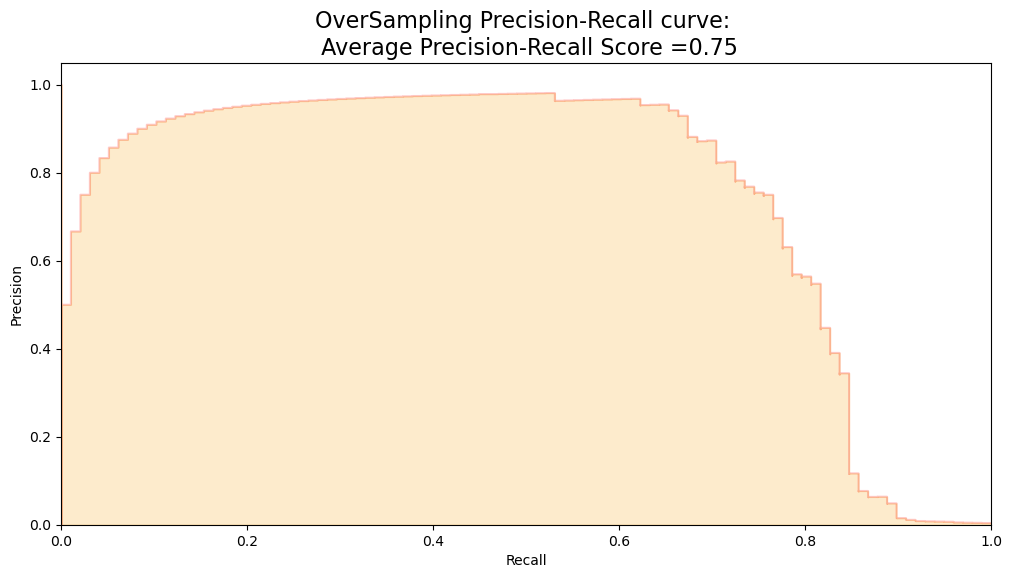

In [72]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision,step='post',alpha=0.2,color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [75]:
sm = SMOTE( random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [76]:
t0=time.time()
log_reg_sm=grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1=time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :12.372278213500977 sec


# Test Data with Logistic Regression: 

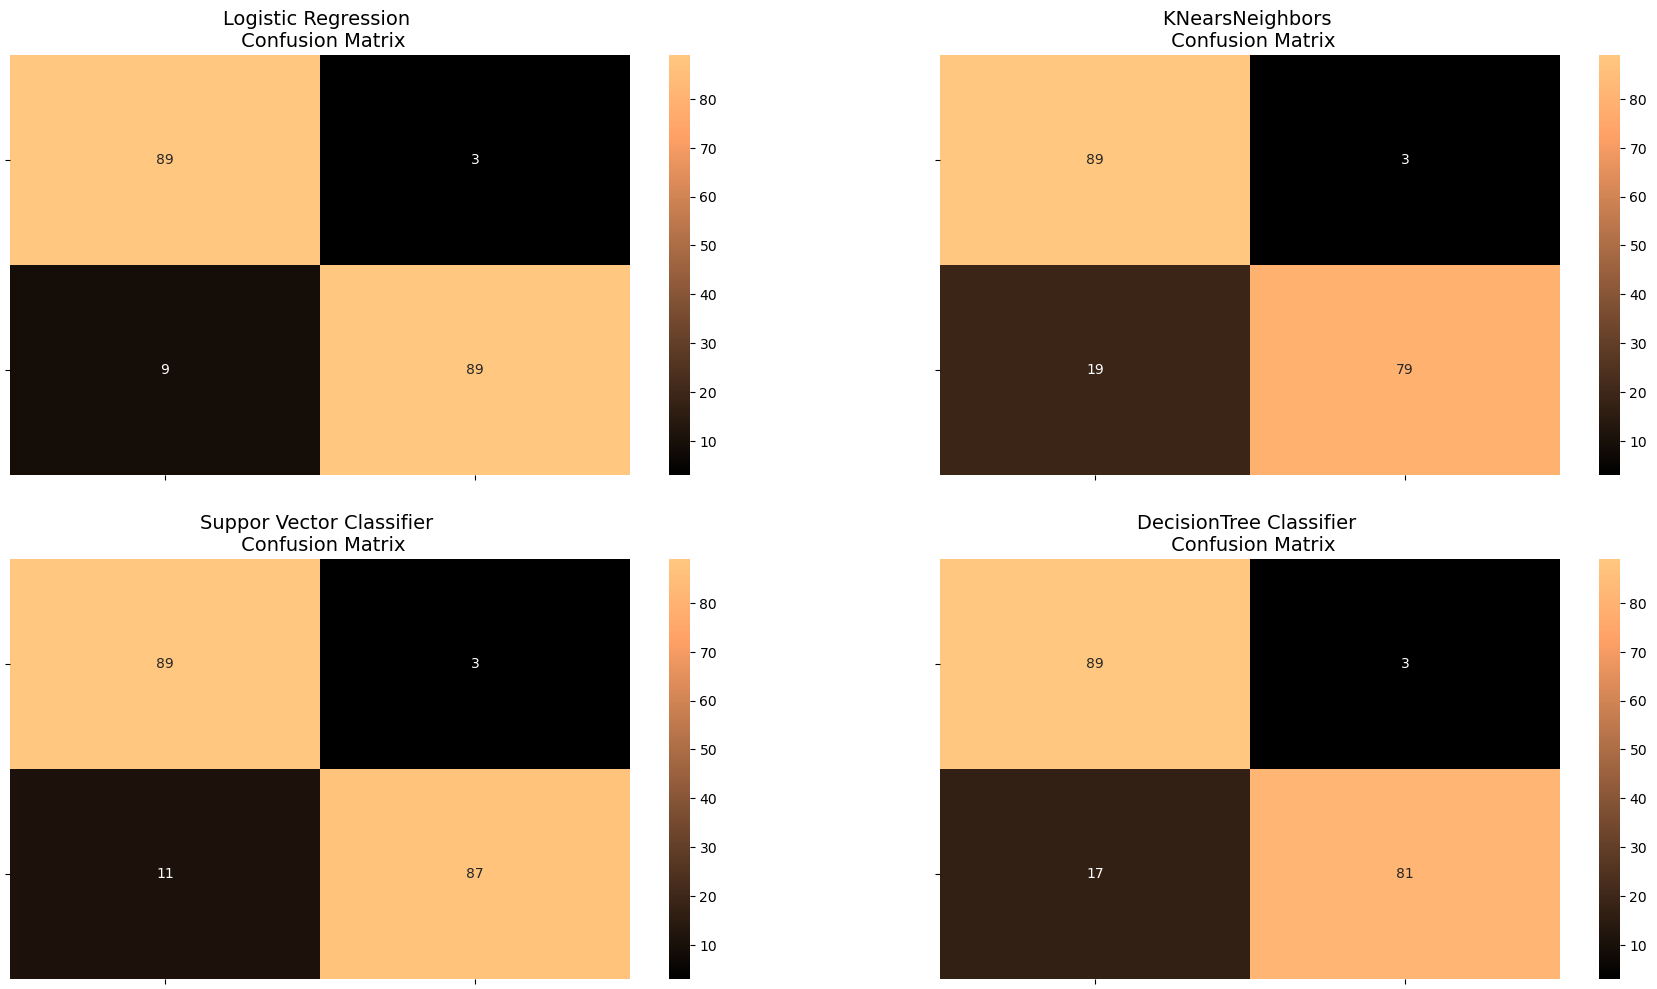

In [77]:
from sklearn.metrics import confusion_matrix
y_pred_log_reg=log_reg_sm.predict(X_test)


y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)


fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [78]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        92
           1       0.97      0.91      0.94        98

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        92
           1       0.96      0.81      0.88        98

    accuracy                           0.88       190
   macro avg       0.89      0.89      0.88       190
weighted avg       0.90      0.88      0.88       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        92
           1       0.97      0.89      0.93        98

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted

In [79]:
from sklearn.metrics import accuracy_score
y_pred=log_reg.predict(X_test)
undersample_score=accuracy_score(y_test, y_pred)

y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.936842
1,Oversampling (SMOTE),0.988115


# Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

In [83]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
n_inputs=X_train.shape[1]

undersample_model=Sequential([
    Dense(n_inputs, input_shape=(n_inputs,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

In [85]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [86]:
undersample_model.compile(Adam(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
undersample_model.fit(X_train,y_train,validation_split=0.2,batch_size=25,epochs=20,verbose=2,shuffle=True)

Epoch 1/20
25/25 - 3s - loss: 0.6489 - accuracy: 0.6909 - val_loss: 0.4056 - val_accuracy: 0.8092 - 3s/epoch - 121ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3218 - accuracy: 0.8711 - val_loss: 0.2934 - val_accuracy: 0.8882 - 242ms/epoch - 10ms/step
Epoch 3/20
25/25 - 0s - loss: 0.2428 - accuracy: 0.9074 - val_loss: 0.2391 - val_accuracy: 0.8947 - 132ms/epoch - 5ms/step
Epoch 4/20
25/25 - 0s - loss: 0.1919 - accuracy: 0.9289 - val_loss: 0.2045 - val_accuracy: 0.9211 - 141ms/epoch - 6ms/step
Epoch 5/20
25/25 - 0s - loss: 0.1580 - accuracy: 0.9405 - val_loss: 0.1848 - val_accuracy: 0.9211 - 126ms/epoch - 5ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1370 - accuracy: 0.9521 - val_loss: 0.1890 - val_accuracy: 0.9276 - 120ms/epoch - 5ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1213 - accuracy: 0.9554 - val_loss: 0.1884 - val_accuracy: 0.9211 - 128ms/epoch - 5ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1096 - accuracy: 0.9587 - val_loss: 0.1879 - val_accuracy: 0.9211 - 115ms/epoch - 5ms/step
Epoch 9/20
25/25

In [88]:
undersmaple_predictions=undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [90]:
undersample_fraud_predictions= np.argmax(undersmaple_predictions, axis=1)

In [92]:
undersample_fraud_predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion_matrix',cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[53454  3409]
 [    6    92]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


<Figure size 1600x800 with 0 Axes>

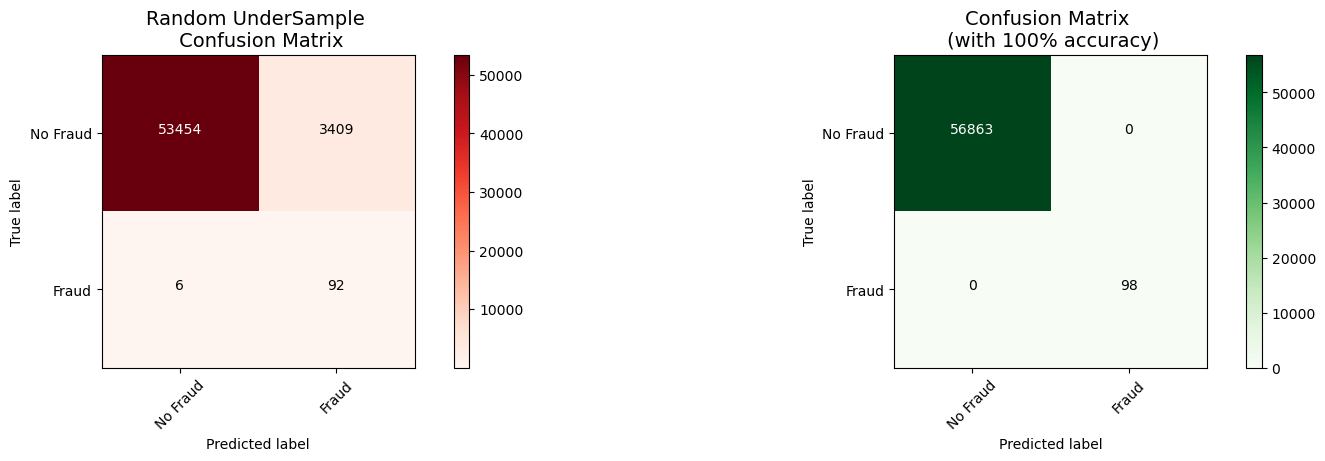

In [94]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

# Keras oversampling - SMOTE

In [95]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [96]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 7s - loss: 0.0555 - accuracy: 0.9804 - val_loss: 0.0140 - val_accuracy: 0.9992 - 7s/epoch - 6ms/step
Epoch 2/20
1214/1214 - 4s - loss: 0.0103 - accuracy: 0.9978 - val_loss: 0.0095 - val_accuracy: 0.9988 - 4s/epoch - 4ms/step
Epoch 3/20
1214/1214 - 4s - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 4/20
1214/1214 - 5s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0072 - val_accuracy: 0.9990 - 5s/epoch - 4ms/step
Epoch 5/20
1214/1214 - 4s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 6/20
1214/1214 - 6s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0012 - val_accuracy: 0.9997 - 6s/epoch - 5ms/step
Epoch 7/20
1214/1214 - 8s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 1.0000 - 8s/epoch - 7ms/step
Epoch 8/20
1214/1214 - 5s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0089 - val_accuracy: 0.9980 - 5s/epoch - 4ms/step
Epoch 9/

In [98]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [99]:
oversample_fraud_predictions=np.argmax(oversample_predictions,axis=1)

In [100]:
oversample_fraud_predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[56844    19]
 [   31    67]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


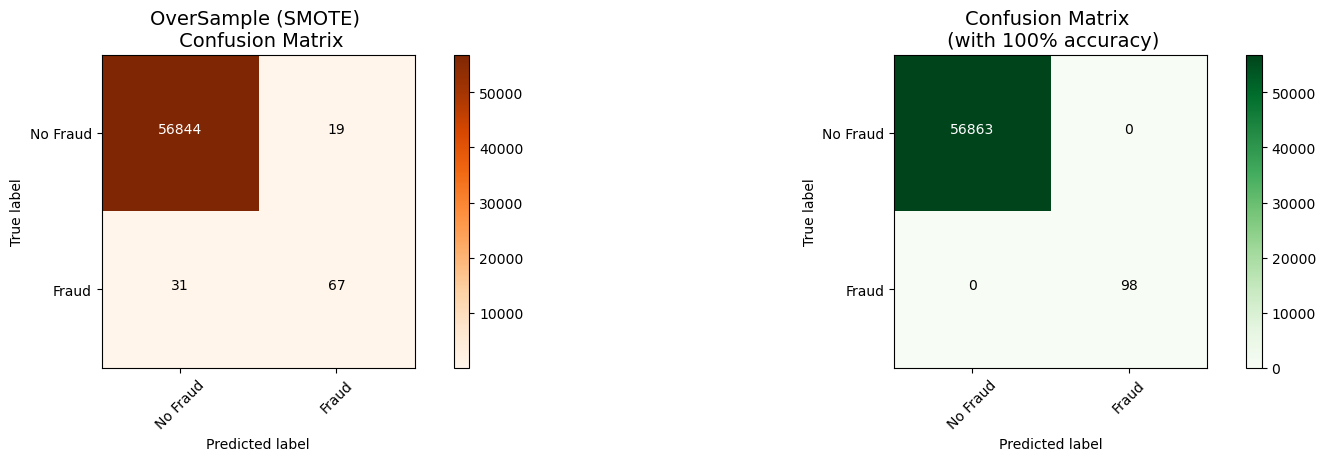

In [101]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)